# Code for Question 2
## Are there some redundant bus routes that can be cancelled?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
transit_data = pd.read_csv("./transit_data_october.csv")
transit_routes = pd.read_csv("./transit_routes.csv")
census_data = pd.read_csv("./neighbourhood_census.csv")

# transit_data.head()
# transit_routes.head()
# census_data.head()

## 1. Determine the most used bus routes

The objective of the code below is to take the data contained in transit_data_october.csv and count how many times each bus route was used in the month. Then, we can sort them routes by popularity.

In [37]:
route_usage = {}

for i in range(0, len(transit_data)):

    route_name = "route" + str(transit_data["Route"][i])

    # first time a unique route has been encountered. Set usage count to 1.
    if route_name not in route_usage.keys():
        route_usage[route_name] = 1
    else:
        route_usage[route_name] += 1


sorted_route_usage = sorted(route_usage.items(), key = lambda item : item[1])

for items in sorted_route_usage:
    print(items)

('route17', 1710)
('route8', 2295)
('route13', 3616)
('route14', 4777)
('route10', 11683)
('route18', 12349)
('route20', 16939)
('route16', 17555)
('route11', 19183)
('route6', 20116)
('route12', 23567)
('route15', 24001)
('route7', 24508)
('route4', 31207)
('route601', 38617)
('route3', 40953)
('route502', 71229)
('route1', 71450)
('route501', 78520)
('route2', 93880)
('route701', 96384)


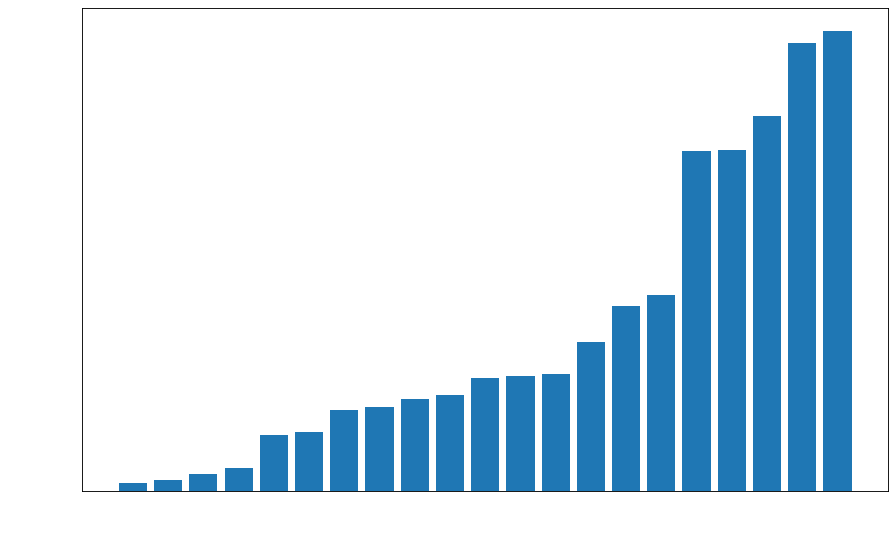

In [80]:
# create bar chart
route_labels = []
route_count = []

for items in sorted_route_usage:
    route_labels.append(items[0][5:])
    route_count.append(items[1])

fig = plt.figure(
    figsize = (13, 8),
    dpi = 80
)

ax = fig.add_subplot(111)
# adjust color of labels here if necessary
axis_color = "white"

# x axis label
ax.set_xlabel("Route Number", fontsize=20)
ax.xaxis.label.set_color(axis_color)

#y axis label
ax.set_ylabel("Number of Passengers", fontsize=20)
ax.yaxis.label.set_color(axis_color)

# axis ticks
ax.tick_params(axis="x", colors=axis_color)
ax.tick_params(axis="y", colors=axis_color)

plt.bar(
    x=route_labels,
    height=route_count
)

plt.show()

## 2. Determining Redundant Bus Routes - Community Population

The objective of the code below is to sort the communities of Kingston by their population based on the 2016 census.

In [3]:
sorted_census = census_data.sort_values(
    by="Total Population 2016",
    ascending=False
)

sorted_census = sorted_census[["Community Name", "Total Population 2016"]]
sorted_census["Population Rank"] = range(0, len(sorted_census))
sorted_census["Total Population 2016"] = pd.to_numeric(sorted_census["Total Population 2016"])

sorted_census

,Community Name,Total Population 2016,Population Rank
23,Kingston,123798,0
36,Cataraqui Westbrook,7235,1
29,Gardiners / Meadowbrook,6940,2
24,Inner Harbour,6810,3
38,Rideau Heights,6455,4
20,Greenwood / St Lawrence South,5575,5
34,Sunnyside,5205,6
15,Auden Park,5155,7
17,Kingscourt/Novelis(Alcan),4985,8
11,Westwoods,4815,9


<Figure size 432x288 with 0 Axes>

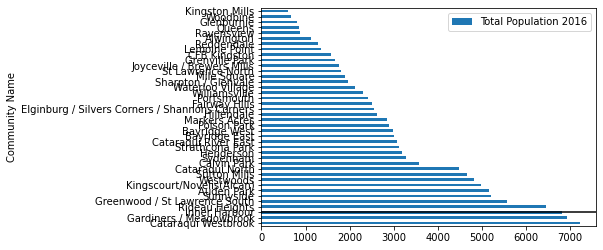

In [4]:
sorted_census = sorted_census.iloc[1:, :]

plt.figure()
sorted_census.plot.barh(y="Total Population 2016", x="Community Name")
plt.axhline(2, color="k")
